In [1]:
using Plots
using Random: MersenneTwister

include("../src/EnvironmentalVariability.jl")
using .EnvironmentalVariability: ar1

include("../src/ColorScheme.jl")
using .ColorScheme
const CS = ColorScheme

println("Julia $(VERSION)")
println("Thread count: $(Threads.nthreads())")

Julia 1.10.2
Thread count: 12


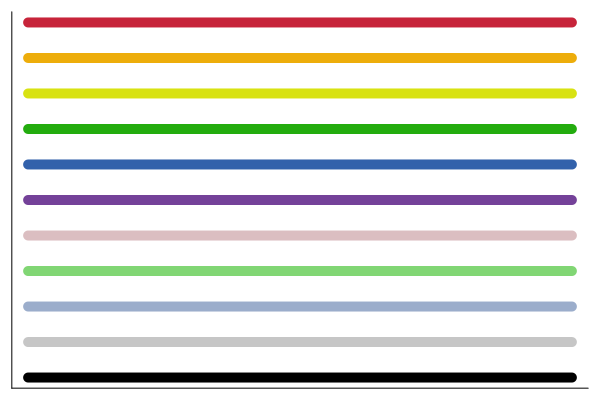

In [2]:
p = plot(xtick=false, ytick=false)
for (i, color) in enumerate(CS.COLORS)
    plot!(1:2, fill(-i, 2), lc=color, lw=10, label=false)
end
display(p)

In [3]:
default(
    fontfamily="Times New Roman",
    titlefontsize=16,
    guidefontsize=14,
    tickfontsize=11,
    legendfontsize=11,
    # margin=1Plots.mm,
);

In [4]:
function plot_line!(
    plt::Plots.Plot,
    lw::Float64,
    lc::String,
    β::Float64,
    σ::Float64,
    μ::Float64 = 0.5,
    t_max::Int = 100,
    rng::MersenneTwister = MersenneTwister(6)
)::Nothing
    plot!(plt, 1:t_max, ar1(μ, β, σ, t_max, rng), label="\\beta=$(β), \\sigma_{U}=$(σ)", lc=lc, lw=lw)

    return
end;

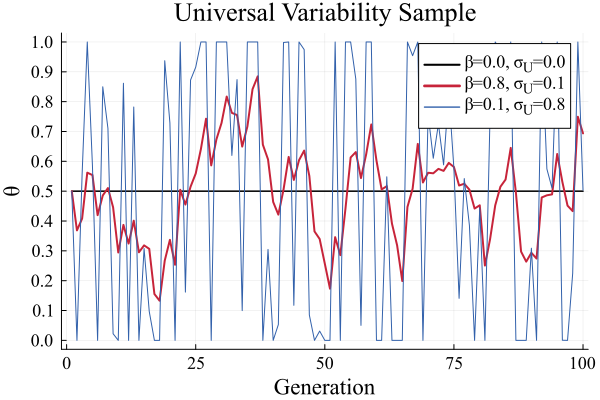

In [5]:
p = plot(
    xlim=(-1,101),
    ylim=(-0.03,1.03),
    yticks=0:0.1:1,
    xlabel="Generation",
    ylabel="\\theta",
    title="Universal Variability Sample",
    legend=:topright,
)

plot_line!(p, 1.5, CS.BLACK, 0.0, 0.0)
plot_line!(p, 2.0, CS.RED, 0.8, 0.1)
plot_line!(p, 1.0, CS.BLUE, 0.1, 0.8)

display(p)
savefig(p, "img/Fig1b.png");